In [1]:
import numpy as np
import skeliner as sk

import matplotlib.pyplot as plt

### Find contacts between Cell A and B

In [2]:
dsgc = sk.io.load_npz("../../data/DSGC/720575940567182923/skeleton.npz")
sac_off = sk.io.load_npz("../../data/SAC-OFF/720575940572154471/skeleton.npz")

In [3]:
contacts = sk.pair.find_contacts(dsgc, sac_off)

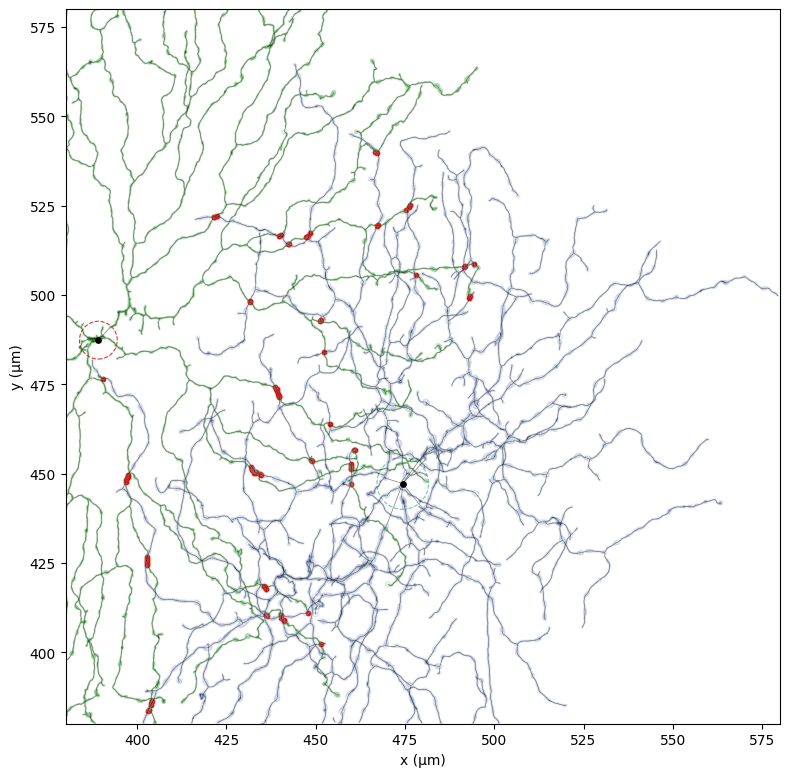

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sk.plot2d(sac_off, color_by="ntype", skel_cmap="Set1", ax=ax, xlim=(380, 580), ylim=(380, 580))
sk.plot2d(dsgc, color_by="ntype", skel_cmap="Set2", ax=ax, xlim=(380, 580), ylim=(380, 580))

plt.scatter(contacts.pos[:, 0], contacts.pos[:, 1], color="red", s=10)


### Find contacts between Cell A and many other cells

In [5]:
import glob

dsgc = sk.io.load_npz("../../data/DSGC/720575940567182923/skeleton.npz")

sacs_on = glob.glob("../../data/SAC-ON/*/skeleton.npz")
sacs_off = glob.glob("../../data/SAC-OFF/*/skeleton.npz")

In [6]:
on_contact_all = []
off_contact_all = []
for sac_on_path in sacs_on:
    sac_on = sk.io.load_npz(sac_on_path)

    on_contacts = sk.pair.find_contacts(dsgc, sac_on)
    on_contact_all.append(on_contacts.pos)

for sac_off_path in sacs_off:
    sac_off = sk.io.load_npz(sac_off_path)

    off_contacts = sk.pair.find_contacts(dsgc, sac_off)
    off_contact_all.append(off_contacts.pos)

on_contact_all = np.vstack(on_contact_all)
off_contact_all = np.vstack(off_contact_all)


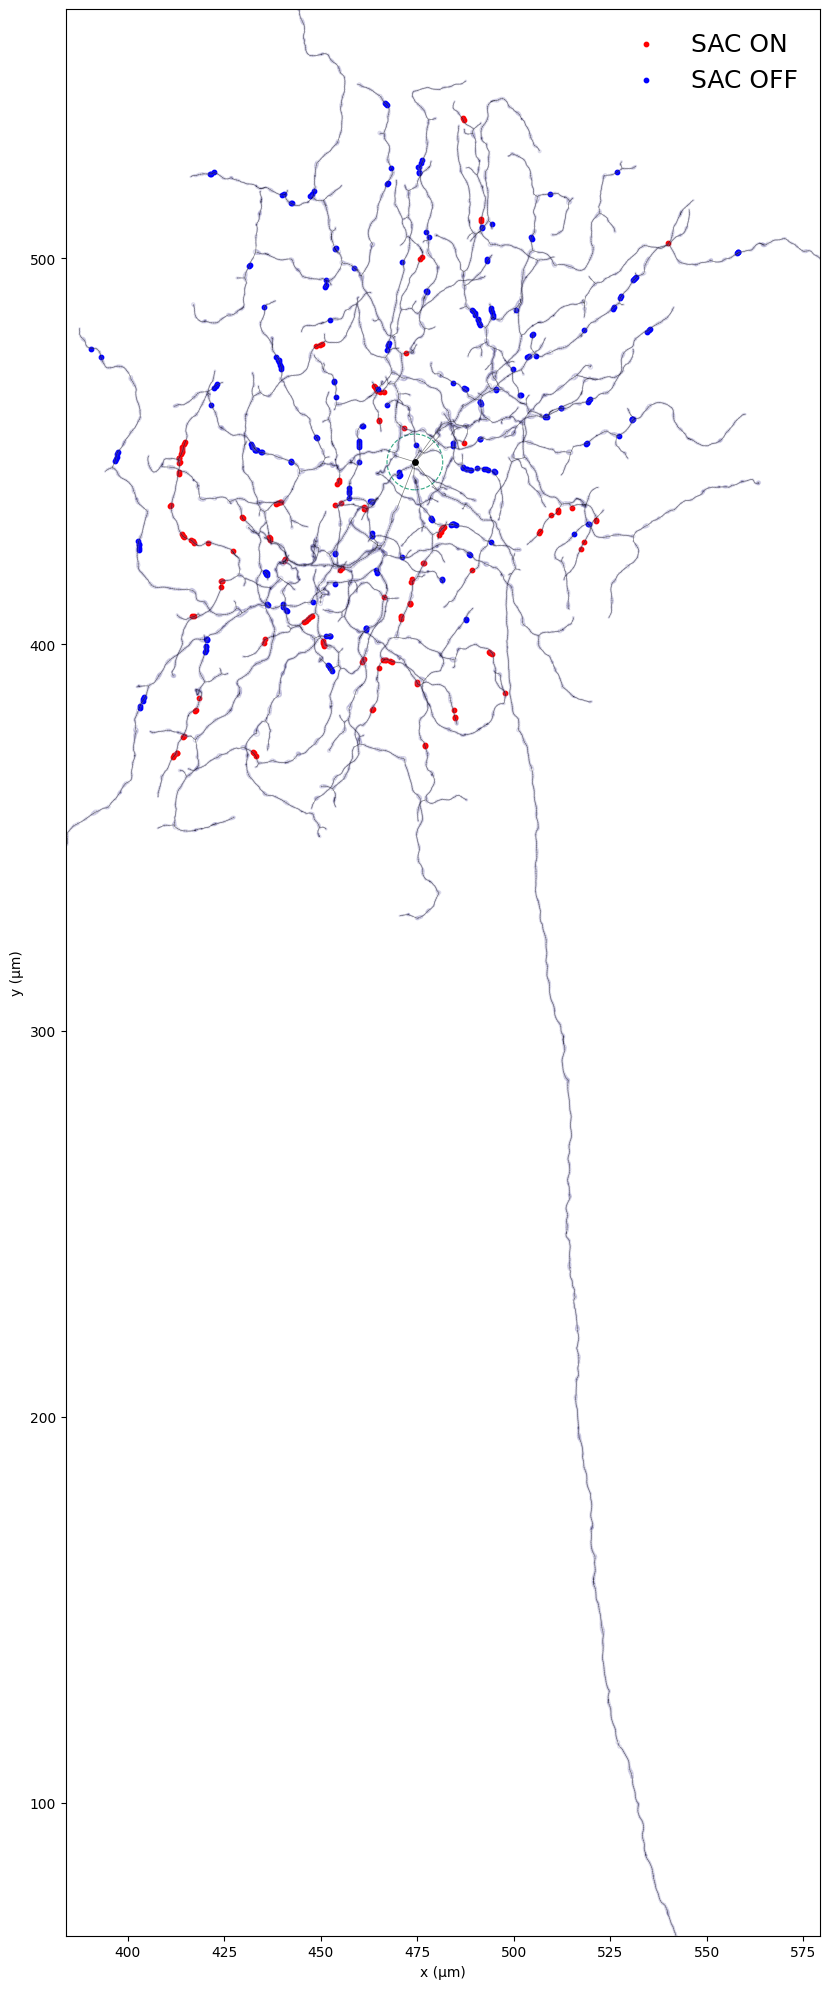

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))
sk.plot2d(dsgc, color_by="ntype", skel_cmap="Dark2", ax=ax)

plt.scatter(on_contact_all[:, 0], on_contact_all[:, 1], color="red", s=10, label="SAC ON")
plt.scatter(off_contact_all[:, 0], off_contact_all[:, 1], color="blue", s=10, label="SAC OFF")
plt.legend(frameon=False, loc="upper right", fontsize=18)

In [8]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-08-29 11:00:21CEST

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 9.2.0

matplotlib: 3.10.3
numpy     : 2.0.2
skeliner  : 0.1.11

Watermark: 2.5.0

